<a href="https://colab.research.google.com/github/hwayoung306/AI/blob/main/20220511_ml_10_%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%EA%B5%B0%EC%A7%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 코렙에서 한글 사용

In [1]:
!apt -qq -y install fonts-nanum
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


### 구글드라이브 연동

In [2]:
# 구글드라이브 연동
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# 구글 드라이브 파일 확인
!ls '/gdrive/My Drive/temp/'

# 반복되는 드라이브 경로 변수화
drive_path = '/gdrive/My Drive/temp/'

Mounted at /gdrive
 매수종목1.txt			       'sample (1).xlsx'
'2. 영화평점, 날짜별 영화평점 시각화'   sample2.pdf
 매수종목2.txt			        sample.docx
 atlas-higgs-challenge-2014-v2.csv.gz   sample_merge.pdf
 auto-mpg.csv			        sample.xlsx
 bmi_500.csv			        score.csv
 매수종목.csv			        seoul.html
 data_studentlist_en.csv	       'stock price (1).xlsx'
'demo (1).docx'			       'stock price.xlsx'
 demo.docx			        stock_px.csv
 example.docx			       'stock valuation.xlsx'
 heart_disease.csv		        test.db.db
 height_weight.txt		        test.txt
 hello_world.xlsx		        Titanic배포용
 HelloWorld.xlsx		        titanic_test.csv
'house_price (1).csv'		        titanic_train.csv
 house_price.csv		        titanic.xls
'little-char (1).png'		        titanic.xlsx
 little-char.png		        Traffic_Accident_2017.csv
 population_number.csv		        train.csv
 ram_price.csv			        user_id_mean.csv
 ratings_small.txt		        wine.csv
'sample1 (1).pdf'		        주ᄀ

### 초기화

In [3]:
# 경고메시지 무시
import warnings
warnings.filterwarnings("ignore")

In [4]:
!pip install mglearn

     |████████████████████████████████| 540 kB 5.0 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=135659866966e4c409b79cce80f8ed74322c1a41b6645b0bc8d6aa24591fa86c
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn




```
# Windows 한글
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
```



#### 지도학습과 비지도학습 차이 회고

- 지도학습 : 타겟값을 알고 있는 (y값이 있는) 데이터를 이용해 새로운 객체의 타겟 변수값을 예측할 수 있는 패턴을 찾아내는 것

- 비지도학습 : 타겟 변수에 신경쓰지 않고 데이터 집합에 있는 어떤 규칙성을 찾으려는 것<br>(y 값이 없을 때)

# 군집(clustering)

- 데이터에서 자연스럽게 분류되는 그룹을 찾아내는 개념
- 데이터셋을 비슷한 것끼리 클러스터(cluster)라는 그룹으로 나눔
- 분류 알고리즘과 비슷하게 군집 알고리즘은 각 데이터 포인트가 어느 클러스터에 속하는지 할당(또는 예측)


군집(clustering) 응용분야

- 고객분류 (추천 시스템)
- 데이터 분석 (분류된 클러스터별로 분석)
- 차원축소 기법 ( 클러스터에 대한 샘플의 친화성 affinity을 측정하여 각 샘플의 특성 벡터 x를 클러스터 친화성의 벡터로 변환)
- 이상치 탐지 (모든 클러스터에 친화성이 낮은 샘플은 이상치일 가능성이 높음)
- 준지도학습 (레이블된 샘플이 적을 경우 군집을 통해 동일한 클러스터에 있는 모든 샘플에 레이블을 전파)
- 검색 엔진 (유사 이미지 검색)
- 이미지 분할 (색을 기반으로 픽셀을 클러스터화여 동일 클러스터를 평균 색으로 변환하면, 색상이 감소하여 물체의 윤곽을 감지하기 쉬워짐)

군집(clustering) 알고리즘 종류

- K 평균 군집(K-means) : k개로 그룹화 시켜라
- 계층형 군집(k를 구해주는) : 병합적, 분할적
- DBSCAN

## k-평균 군집 (K-means)

- 주어진 데이터를 K개의 클러스터(cluster)로 묶는 알고리즘
- 데이터의 어떤 영역을 대표하는 클러스터 중심(cluster center)을 찾음

- K-means 에서 평균은 중점이며, 군집(cluster)에 들어 있는 객체들은 각 차원별로 산술 평균값으로 표현
 - 일반적으로 중점은 군집에 있는 모든 사례가 가진 특징의 평균값

- K-means 에서 K는 데이터에서 찾아내려는 군집 수
 - 원하는 군집의 개수로 시작
 - 각 군집이 자신의 중점에 가까운 점들을 갖도록 군집의 중점을 다시 계산
 - 이 기법을 최근접 이웃 군집화라고 부르기도 함

K-means 단계

1. 클러스터(cluster)의 개수 K값 설정

2. 클러스터마다 초기 중심 설정(초기 중심은 각 학습 데이터가 자신이 속한 클러스터를 결정하는데 기준점)

3. 모든 데이터는 k개의 초기 중심까지 거리를 계산하고 가장 가까이에 있는 중심을 자기 클러스터의 중심이라 판단

4. 클러스터가 정해지면 각 클러스터의 평균(중심)을 구해 이를 새로운 중심으로 정함

5. 학습이 진행되면서 각 클러스터마다 최적의 중심으로 이동(중심 재계산)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

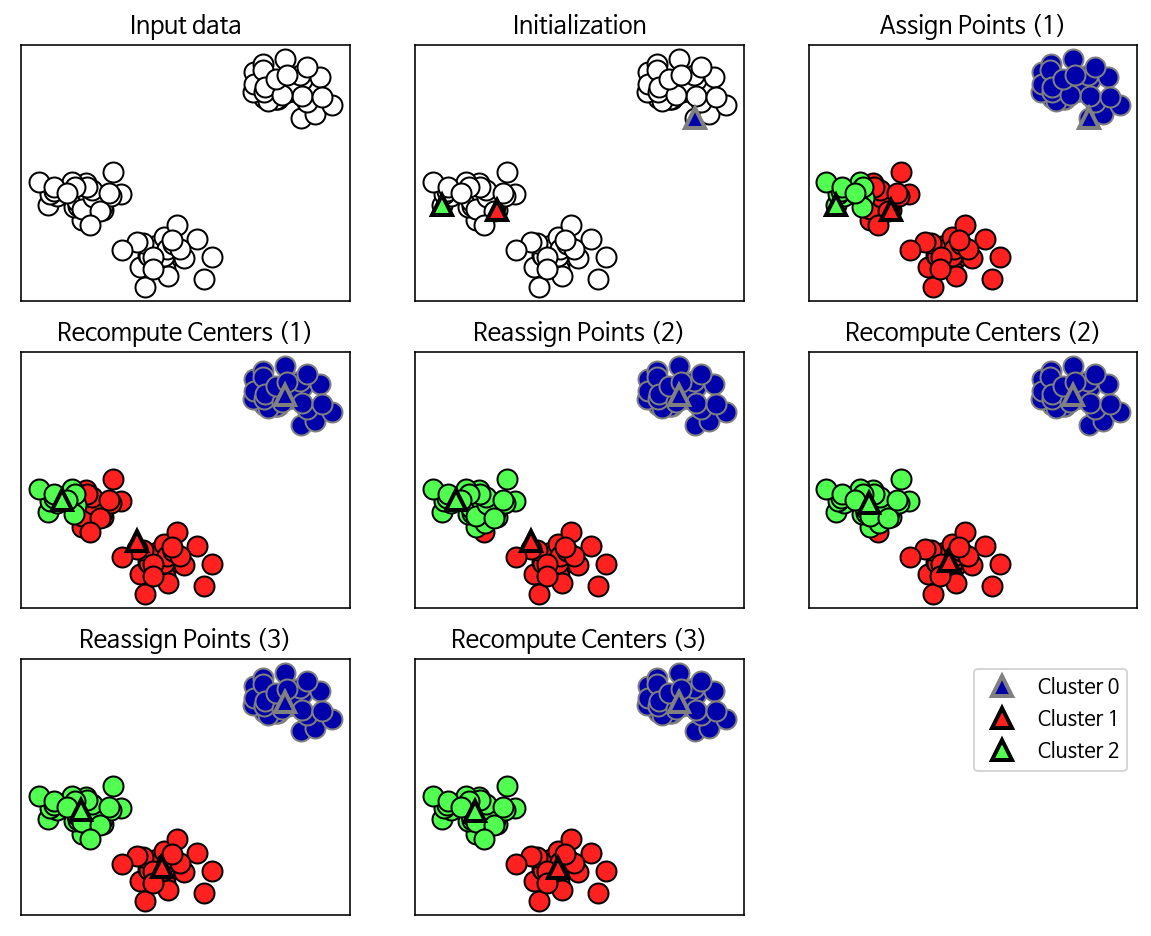

In [6]:
# K-means 알고리즘 과정(단계)
mglearn.plots.plot_kmeans_algorithm()

- 입력 데이터(Input data) : 삼각형은 클러스터 중심, 원은 데이터 포인트, 클러스터는 색으로 구분
- 초기화(Initialization) : 클러스터 중심으로 삼을 데이터 포인트 3개를 무작위로 초기화
- 반복 : 클러스터 중심에 할당되는 포인트에 변화가 없을 때까지 반복
  - 포인트 할당(Assign Points) : 각 데이터 포인트를 가장 가까운 클러스터 중심에 할당
  - 중심 재계산(Recompute Centers) : 할당한 포인트의 평균값으로 클러스터 중심을 갱신


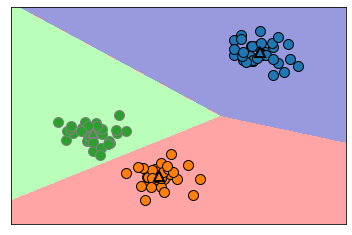

In [ ]:
# K-means 알고리즘으로 찾은 클러스터 중심과 경계
mglearn.plots.plot_kmeans_boundaries()

[KMeans()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
```
KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
```
Parameters:
- n_clusters : 군집화할 개수(군집 중심점의 개수를 의미)
- init : 군집 중심점의 좌표를 설정하는 방식
- max_iter : 최대 반복 횟수, 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료

Attributes:
- labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
- cluster_centers_ : 각 군집 중심점 좌표 ([군집 개수, 피처 개수] 모양으로 구성). 군집 중심점 좌표 시각화에 이용가능.

#### 군집(clustering) 실습 01

임의의 데이터로 K-means를 이용해 군집화 실습


KMeans(n_clusters=3)

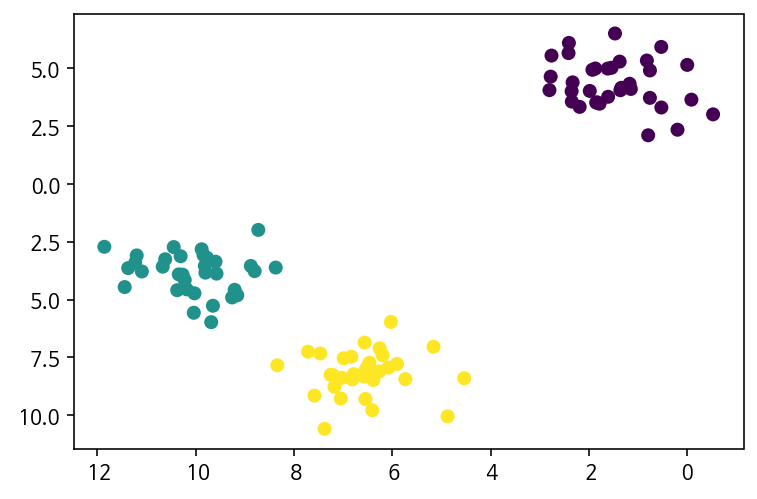

In [9]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적으로 2차원 데이터를 생성
X, y = make_blobs(random_state=1)
plt.scatter(X[:,0], X[:,1], c=y)

# 군집 모델

kmeans = KMeans(n_clusters=3) # 군집화 할 갯수 구하기
kmeans.fit(X) # 계산 시키기

In [12]:
# 클러스터 레이블 (target값 같은 것)
kmeans.labels_  # 100개 만들어짐 0, 1, 2

array([1, 0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 2, 0,
       2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0,
       0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2,
       1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1,
       0, 1, 2, 1, 1, 0, 0, 2, 2, 1, 2, 1], dtype=int32)

In [13]:
# 새로운 데이터의 클러스터 레이블을 예측(predict) -> 참고용
kmeans.predict(X)

array([1, 0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 2, 0,
       2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0,
       0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2,
       1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1,
       0, 1, 2, 1, 1, 0, 0, 2, 2, 1, 2, 1], dtype=int32)

- 기존 훈련세트에 대해 predict를 실행하면 labels_와 같은 값을 얻게됨
- 각 데이터 포인트가 레이블(결과값)을 가진다는 면에서 분류와 조금 비슷
- 그러나 정답을 모르고 있으며 레이블 자체에 어떤 의미가 있지는 않음

[[-10.04935243  -3.85954095]
 [ -1.4710815    4.33721882]
 [ -6.58196786  -8.17239339]]
(3, 2)


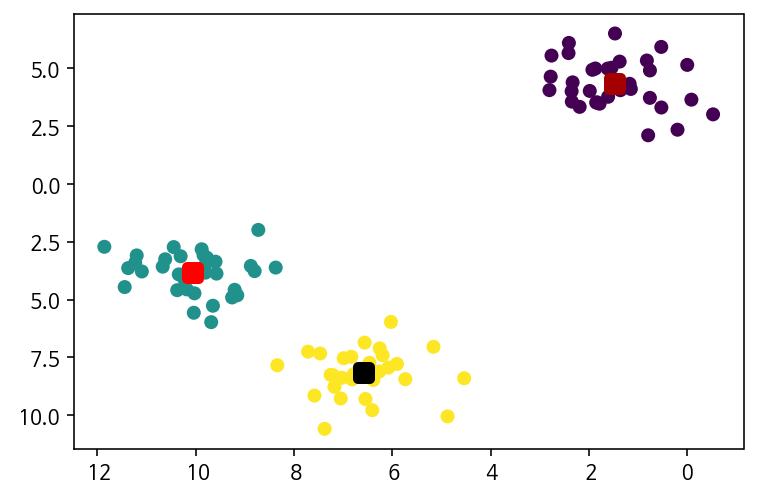

In [21]:
# 클러스터 중심을 시각화 (중심점이 어디인지) -> 속성이 2개라서 2개씩!
print( kmeans.cluster_centers_ )
print( kmeans.cluster_centers_.shape )

xcenter = kmeans.cluster_centers_[:, 0]
ycenter = kmeans.cluster_centers_[:, 1]

plt.scatter(X[:,0], X[:,1], c=y) # 원래그림
plt.scatter(xcenter, ycenter, c=[0,1,2],
            marker = 's', linewidth =5, cmap = plt.cm.flag) # 중심점
plt.show()

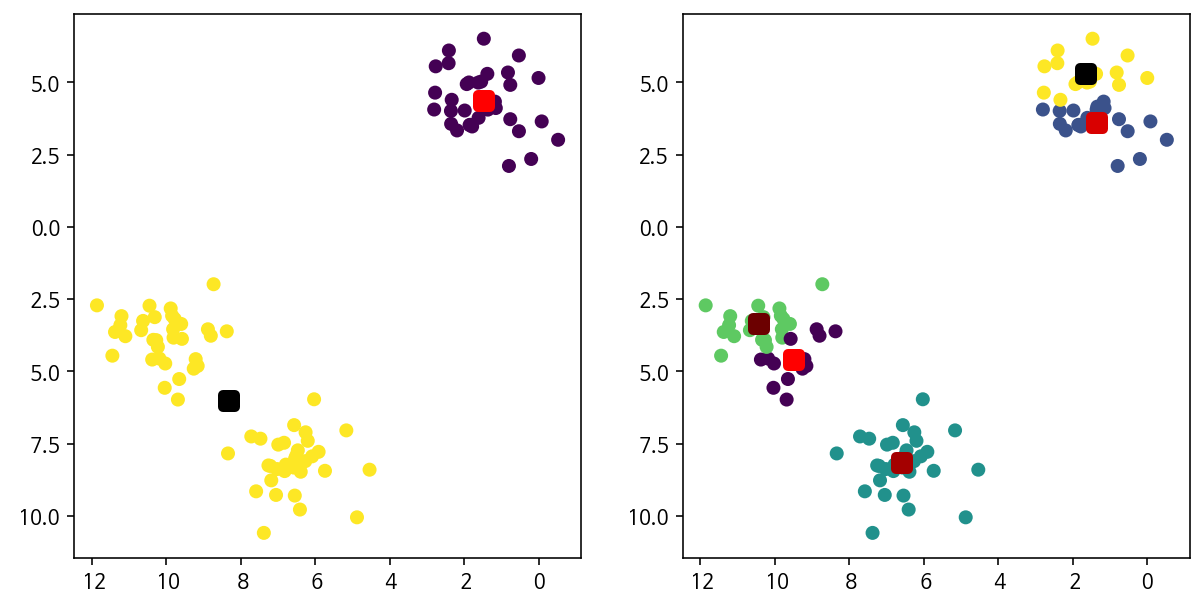

In [48]:
# 클러스터 수를 조정
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 두 개의 클러스터 중심을 사용
kmeans2 = KMeans(n_clusters=2) # 군집화 할 갯수 구하기
kmeans2.fit(X) # 계산 시키기
axes[0].scatter(X[:, 0], X[:, 1], c=kmeans2.labels_)

xcenter = kmeans2.cluster_centers_[:, 0]
ycenter = kmeans2.cluster_centers_[:, 1]
axes[0].scatter(xcenter, ycenter, c=[0,1],
            marker='s', linewidth=5, cmap=plt.cm.flag)


# 다섯 개의 클러스터 중심을 사용
kmeans5 = KMeans(n_clusters=5)
kmeans5.fit(X)
axes[1].scatter(X[:, 0], X[:, 1], c=kmeans5.labels_)
xcenter = kmeans5.cluster_centers_[:, 0]
ycenter = kmeans5.cluster_centers_[:, 1]
axes[1].scatter(xcenter, ycenter, c=[0,1,2,3,4],
            marker='s', linewidth=5, cmap=plt.cm.flag)

In [49]:
pred = kmeans5.predict(X)
pred.shape, pred[0]

((100,), 1)

In [50]:
pred = kmeans5.transform(X)
pred.shape, pred[0]

((100, 5),
 array([10.96808399,  1.57409782, 11.79502525, 11.08072063,  3.29895284]))

In [51]:
inits = np.array( [[0, 2.5], [1,5], [6, 7.5], [9,5], [11, 3]])

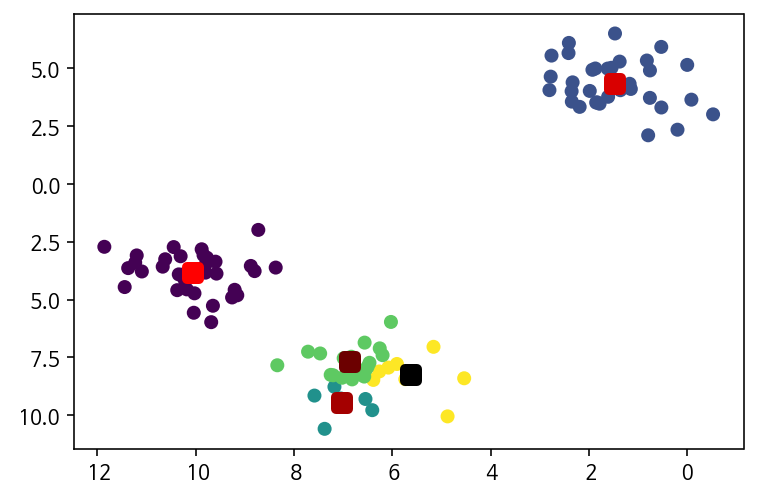

In [52]:
# 시작 센터값을 주었을 때
kmeans5 = KMeans(n_clusters=5, init=inits, n_init =1) # 군집화 할 갯수 구하기
kmeans5.fit(X) # 계산 시키기
plt.scatter(X[:,0], X[:,1], c=kmeans5.labels_)

xcenter = kmeans5.cluster_centers_[:, 0]
ycenter = kmeans5.cluster_centers_[:, 1]
plt.scatter(xcenter, ycenter, c=[0,1,2,3,4],
            marker = 's', linewidth =5, cmap = plt.cm.flag)

In [53]:
# 모델의 이너셔 : 센터와의 평균 제곱 거리
kmeans5.inertia_

132.0367584627386

In [54]:
kmeans5.score(X)

-132.0367584627386

미니배치 k-평균

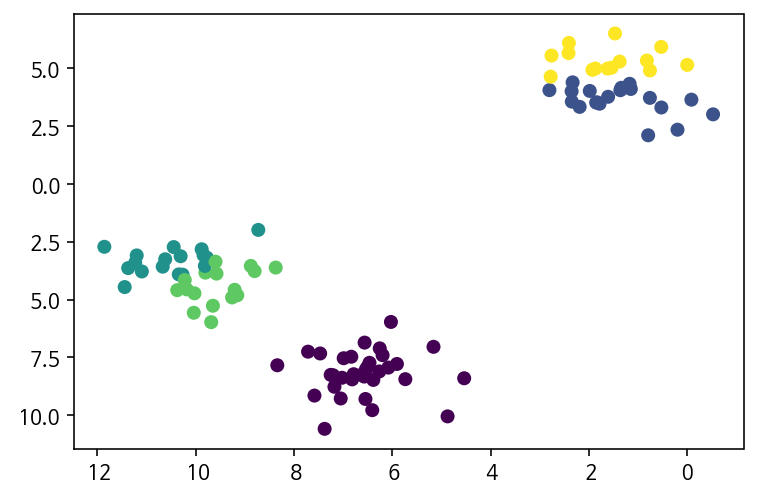

In [55]:
from sklearn.cluster import MiniBatchKMeans

mkmeans5 = MiniBatchKMeans(n_clusters=5, random_state=0)
mkmeans5.fit(X)
plt.scatter(X[:,0], X[:,1], c=mkmeans5.labels_)
plt.show()

In [59]:
# 실행시간 비교
import time

start = time.time()

#.....
kmeans5 = KMeans(n_clusters=5, init=inits, n_init =1) # 군집화 할 갯수 구하기
kmeans5.fit(X)
end = time.time()
el = end - start
print('KMeans실행시간:', str(el))


start = time.time()

#.....
mkmeans5 = MiniBatchKMeans(n_clusters=5, random_state=0)
mkmeans5.fit(X)
end = time.time()
el = end - start
print('MiniBatchKMeans실행시간:', str(el))

KMeans실행시간: 0.00489497184753418
MiniBatchKMeans실행시간: 0.01674032211303711


클러스터 K 개수 구하기

In [64]:
kmeans_list = [ KMeans(n_clusters=k, random_state=0).fit(X) for k in range(1, 10) ]
inertias = [ model.inertia_ for model in kmeans_list ]

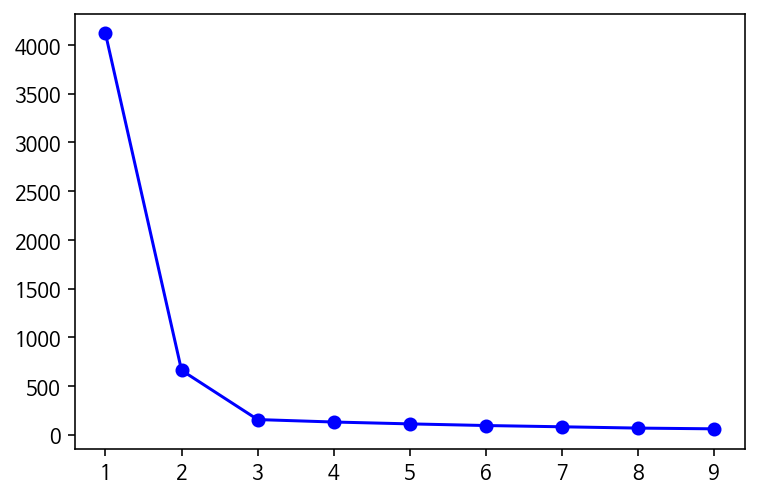

In [65]:
# 이너셔 감소 속도가 변화하는 지점을 K 값으로 선택
# 그래프가 꺽이는 지머을 엘보(elbow)라고 한다
plt.plot(range(1, 10), inertias, 'bo-')
plt.show()

#### 군집(clustering) 실습 02-1

Iris 데이터 k-means 군집화 실습


In [69]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [70]:
# kmeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit( df )
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [71]:
# 실제 붓꽃 품종 분류와 차이를 확인
df[ 'target' ] = iris.target
df[ 'cluster' ] = kmeans.labels_
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1


In [72]:
df.groupby( [ 'target', 'cluster' ] )['sepal_length'].count()

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64

In [74]:
# 2차원 평면으로 군집 시각화 (차원축소이용)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris.data)

df['pca_0'] = X_pca[:, 0]
df['pca_1'] = X_pca[:, 1]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_0,pca_1
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


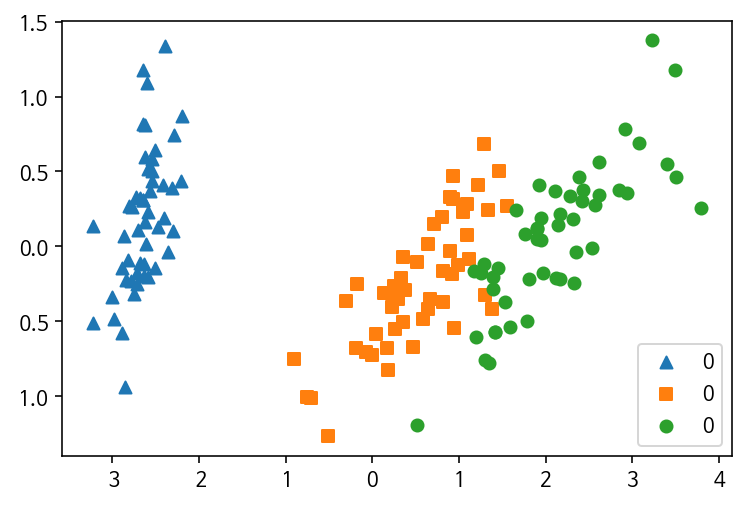

In [76]:
# 각 cluster 별 산점도 
markers = ['^', 's', 'o']
for i, m in enumerate(markers):
  x_data = df[ df['target'] == i ]['pca_0']
  y_data = df[ df['target'] == i ]['pca_1']
  plt.scatter(x_data, y_data, marker=m, label=iris.target[i])

plt.legend()
plt.show()

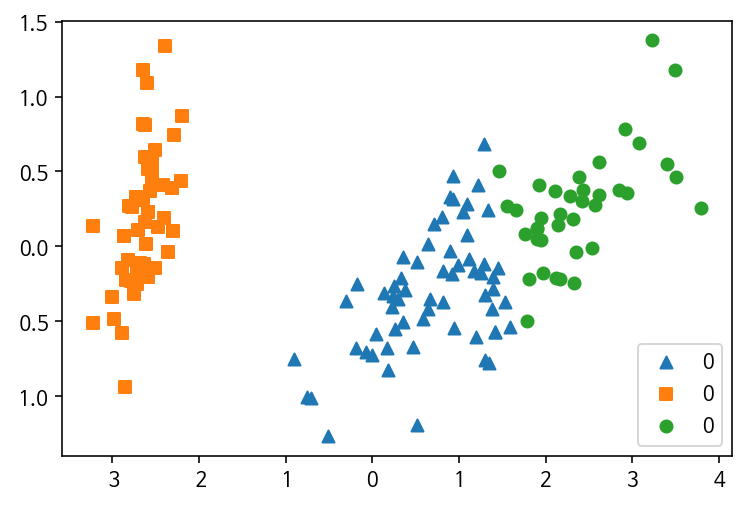

In [79]:
markers = ['^', 's', 'o']
for i, m in enumerate(markers):
  x_data = df[ df['cluster'] == i ]['pca_0']
  y_data = df[ df['cluster'] == i ]['pca_1']
  plt.scatter(x_data, y_data, marker=m, label=iris.target[i])

plt.legend()
plt.show()


#### 군집(clustering) 실습 02-2

손글씨 데이터를 이용해서 KMeans 군집화

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

In [81]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [85]:
from sklearn.datasets import load_digits

digits = load_digits()
df = pd.DataFrame( digits.data )
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


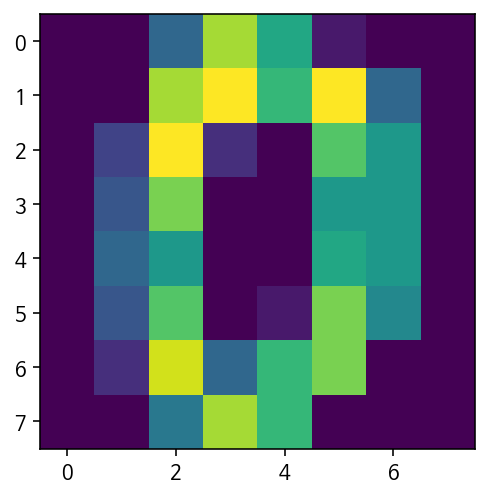

In [86]:
plt.imshow( digits.images[0] )

In [88]:
# kmeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(df)
kmeans.labels_

array([5, 7, 7, ..., 7, 3, 3], dtype=int32)

In [90]:
df['target'] = digits.target
df['cluster'] = kmeans.labels_
df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,target,cluster
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0,5


In [91]:
df.groupby( [ 'target', 'cluster' ] )[0].count()

target  cluster
0       0            1
        5          177
1       1            1
        2            1
        6           55
        7           99
        8           24
        9            2
2       1           13
        3            2
        4            3
        5            1
        6            2
        7            8
        8          148
3       1          154
        2            2
        3           13
        4            7
        7            7
4       0          163
        4            7
        6            7
        7            4
5       0            2
        2          136
        3           43
        9            1
6       5            1
        6            1
        7            2
        9          177
7       4          177
        7            2
8       1            2
        2            4
        3           53
        4            5
        6            5
        7          100
        8            3
        9            2
9       1         

In [92]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(digits.data)

df['pca_0'] = X_pca[:, 0]
df['pca_1'] = X_pca[:, 1]
df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,target,cluster,pca_0,pca_1
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,6.0,13.0,10.0,0.0,0.0,0.0,0,5,-1.259466,21.274885


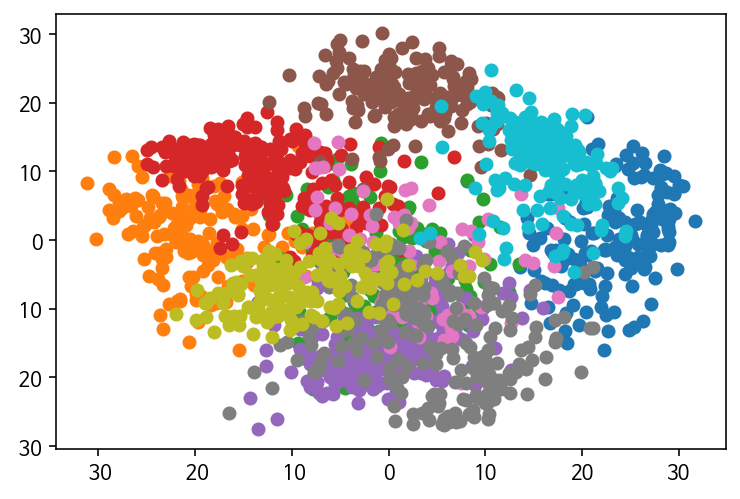

In [95]:
# 각 cluster 별 산점도 
for i in range(10):
  x_data = df[ df['cluster'] == i ]['pca_0']
  y_data = df[ df['cluster'] == i ]['pca_1']
  plt.scatter(x_data, y_data)

plt.show()


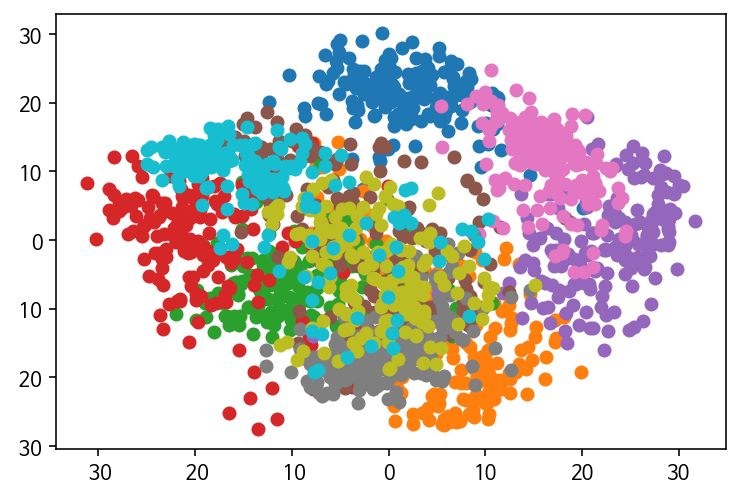

In [96]:
for i in range(10):
  x_data = df[ df['target'] == i ]['pca_0']
  y_data = df[ df['target'] == i ]['pca_1']
  plt.scatter(x_data, y_data)

plt.show()

In [98]:
from sklearn.manifold import TSNE

tene = TSNE(n_components=2, random_state=0 )
X_tene = tene.fit_transform(digits.data)

df['tene_0'] = X_tene[:, 0]
df['tene_1'] = X_tene[:, 1]
df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,target,cluster,pca_0,pca_1,tene_0,tene_1
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0,5,-1.259466,21.274885,-74.250778,2.475528


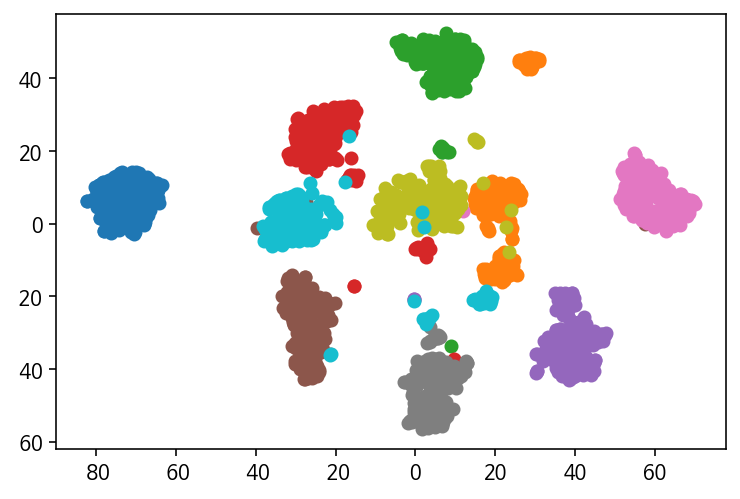

In [99]:
for i in range(10):
  x_data = df[ df['target'] == i ]['tene_0']
  y_data = df[ df['target'] == i ]['tene_1']
  plt.scatter(x_data, y_data)

plt.show()

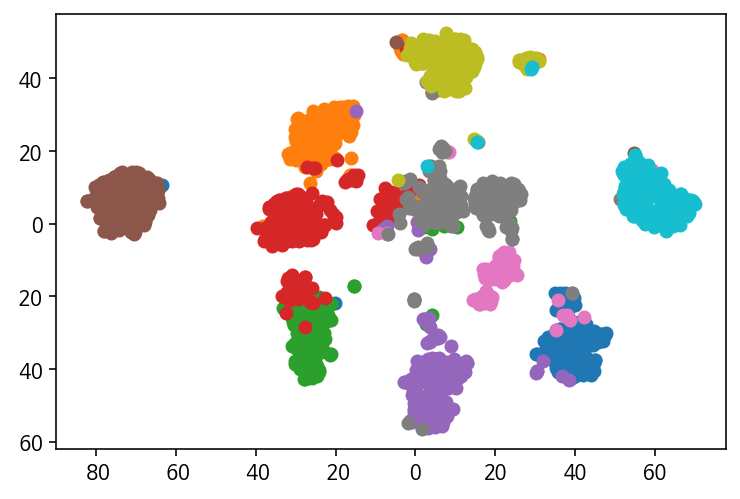

In [100]:
for i in range(10):
  x_data = df[ df['cluster'] == i ]['tene_0']
  y_data = df[ df['cluster'] == i ]['tene_1']
  plt.scatter(x_data, y_data)

plt.show()

#### K-means 알고리즘의 한계

- 클러스터 k를 직접 지정해줘야 하며, k의 값에 따라 결과 값이 완전히 달라질 수 있음
- 평균으로 계산하기 때문에 이상치에 민감
- 구형이 아닌 클러스터의 모양에는 적합치 않음
 - 클러스터의 중심으로부터의 거리를 측정하는 방식이기 때문


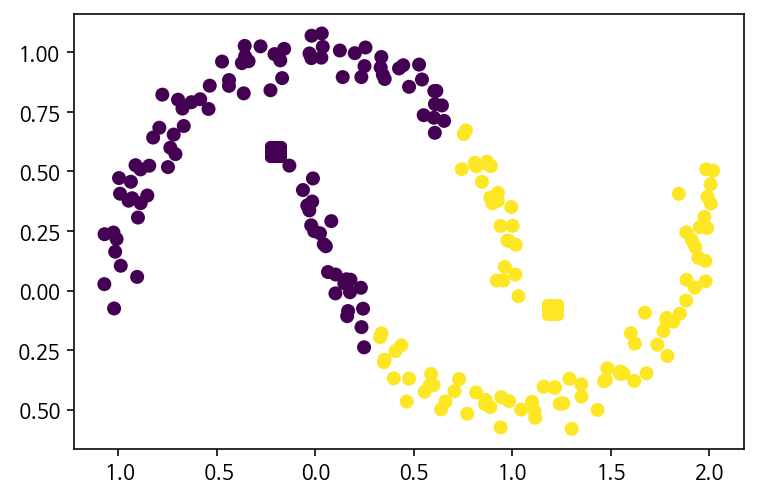

In [107]:
# two_moons 데이터를 생성
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 두 개의 클러스터로 데이터에 KMeans 알고리즘을 적용
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

# 클러스터 할당과 클러스터 중심을 표시
plt.scatter(X[:,0], X[:,1], c= kmeans.labels_)

xcenter = kmeans.cluster_centers_[:,0]
ycenter = kmeans.cluster_centers_[:,1]
plt.scatter(xcenter,ycenter,c=[0,1], marker='s', linewidths=5)


## 병합적 군집(agglomerative clustering) 

- 유사한 특성을 지닌 데이터를 그리디(greedy)하게 묶어 이진 트리 형태로 만들어가는 방법
> *greedy : 현재 수준에서 주어진 조건을 가장 만족하는 후보자를 선택하는 정책

- 시작할 때 각 포인트를 하나의 클러스터로 지정하고 어떤 종료 조건을 만족할 때까지 가장 비슷한 두 클래스를 합침

- 계층적 군집의 한 종류





병합 군집(agglomerative clustering) 단계

1. 모든 데이터를 단일 클러스터로 정의
2. 각 클러스터 간 유사성을 계산
3. 유사성이 가장 높은 두 개의 클러스터를 합침
4. 2, 3단계를 클러스터가 1개가 될 때까지 반복


계층형 군집(Hierarchical Clustering)

- 계층적 트리 모형을 이용하여 개별 데이터 포인트들을 순차적, 계층적으로 유사한 클러스터로 통합하여 군집화를 수행하는 알고리즘

- 계층형 군집 2가지
 - 병합적 군집(agglomerative clustering) : 상향식 군집
 - 분할적 군집(divisive clustering) : 하향식 군집

[AgglomerativeClustering()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering)
```
AgglomerativeClustering(n_clusters=2, *, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None)
```
Parameters :
- n_clusters : 군집화할 개수
- linkage : 유사성을 측정하는 방법 지정
 - ward(기본값) : 분산을 가장 작게 증가 시키는 두 클러스터를 합침 (크기가 비슷한 클러스터가 생성)
 - average : 평균 거리가 가장 짧은 두 클러스터를 합침
 - complete : 최대 거리가 가장 짧은 두 클러스터를 합침
 - single : 클러스터 포인트 사이의 최소 거리가 가장 짧은 두 클러스터를 합침 (scikit-learn 0.20 추가)


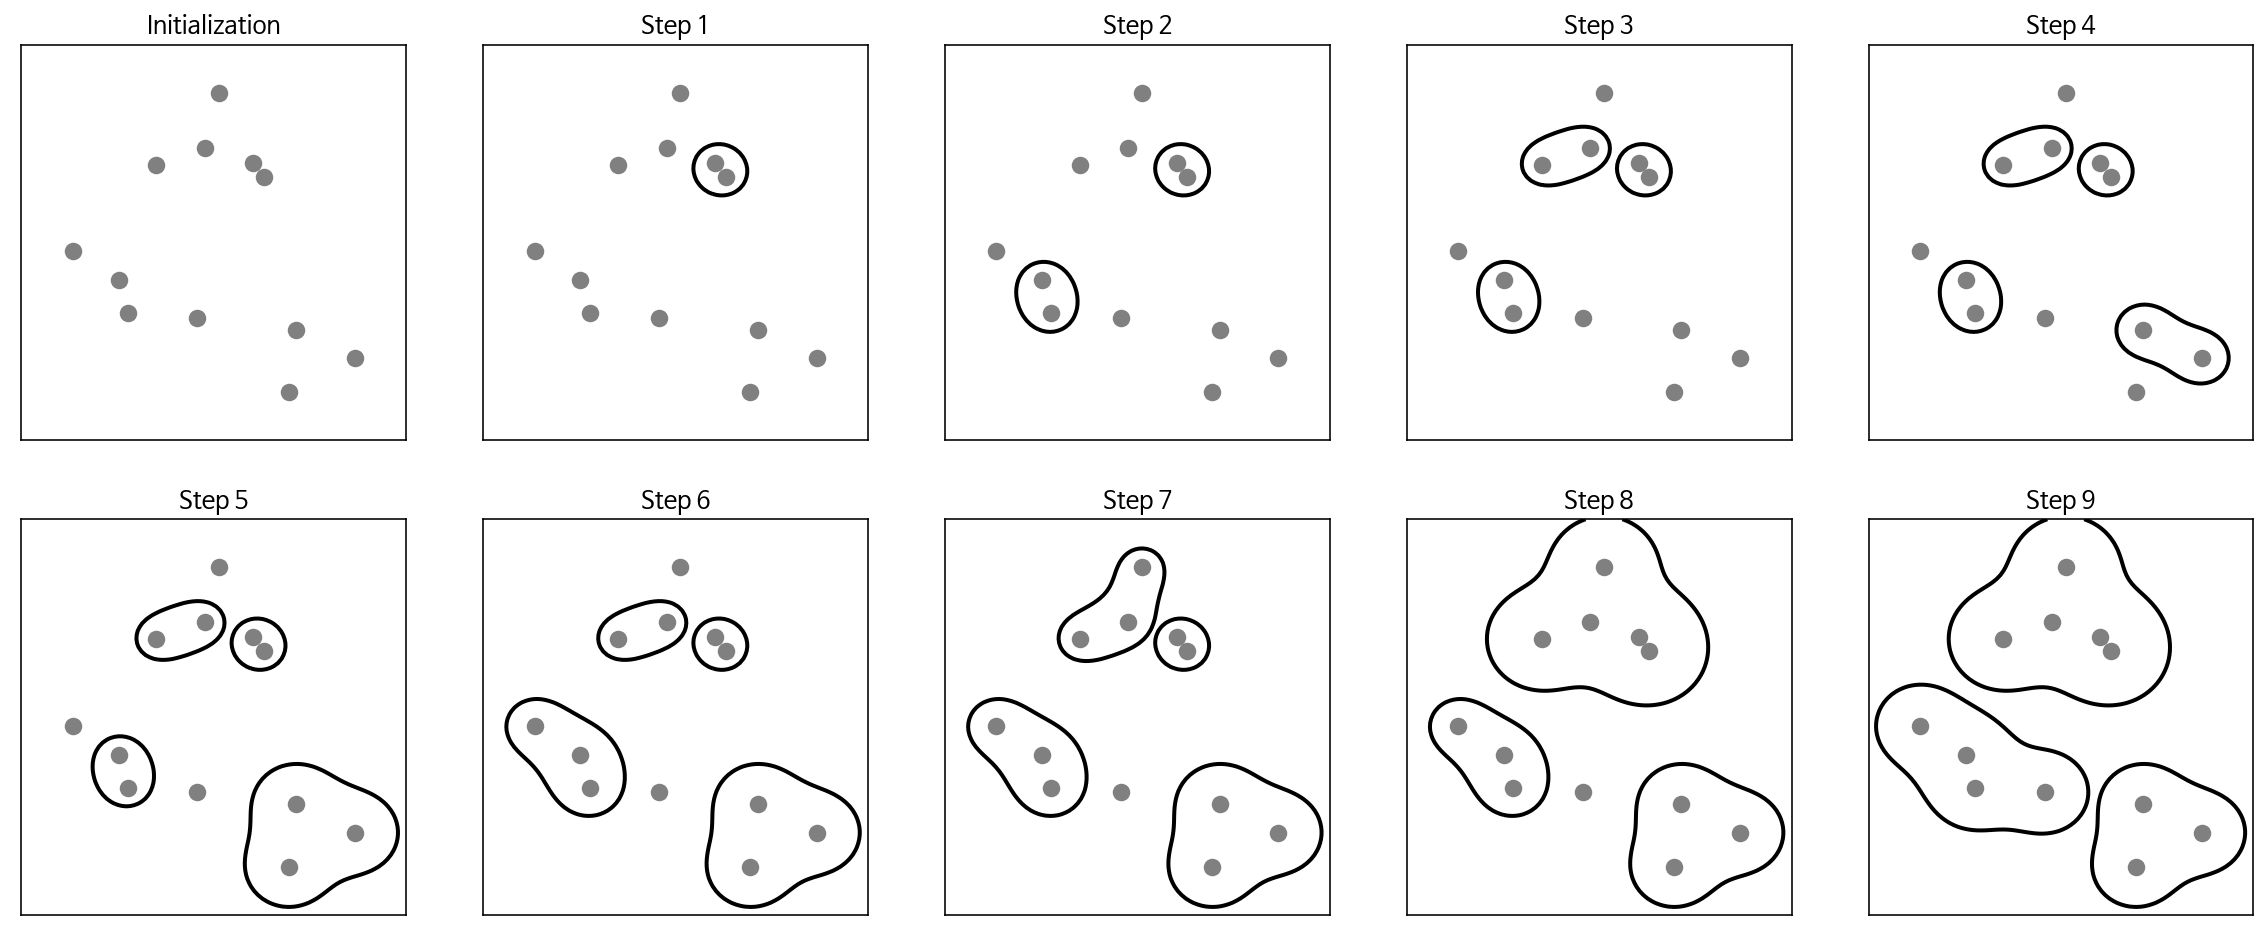

In [108]:
# 두 인접 클러스터를 반복적으로 합쳐나가는 병합 군집 과정(단계)
mglearn.plots.plot_agglomerative_algorithm()

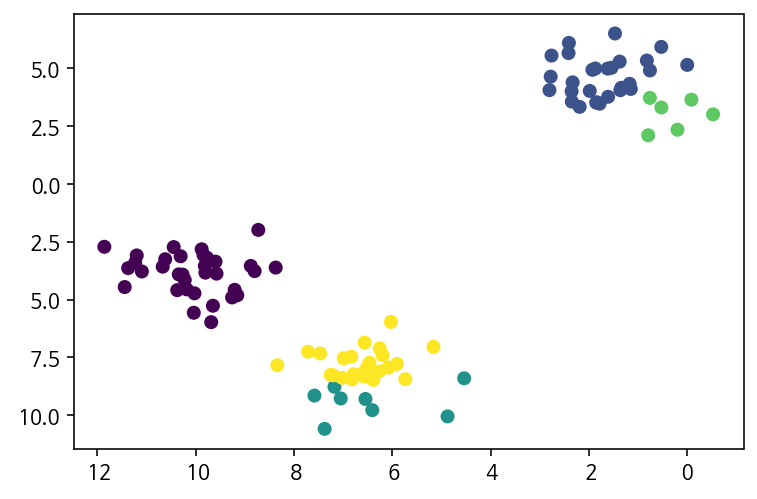

In [112]:
# 병합 군집을 사용한 클러스터 할당(예측)
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=5)
agg.fit(X)

plt.scatter(X[:,0], X[:,1], c=agg.labels_)
plt.show()

덴드로그램 (dendrogram)
- 계층 군집을 시각화하는 도구인 덴드로그램은 다차원 데이터셋을 처리할 수 있음
- SciPy모듈 이용


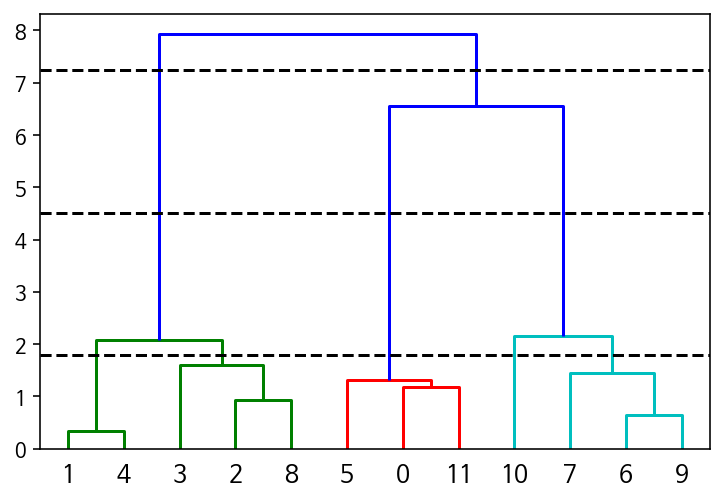

In [120]:
# SciPy에서 ward 군집 함수와 덴드로그램 함수를 임포트
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
#plt.scatter(X[:,0], X[:,1])

# 데이터 배열 X 에 ward 함수를 적용
# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된
# 거리 정보가 담긴 배열을 리턴
linkage_array = ward(X)

# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램으로 시각화
dendrogram(linkage_array)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k') # 2개클러스터
ax.plot(bounds, [4.5, 4.5], '--', c='k')   # 3개 클러스터
ax.plot(bounds, [1.8, 1.8], '--', c='k')   # 3개 클러스터

plt.show()

- y축의 길이는 클러스터가 얼마나 멀리 떨어져 있는지를 나타냄

#### 군집(clustering) 실습 03-1

iris데이터를 활용한 병합 군집


In [121]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [122]:
# AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3)
agg.fit( df )

AgglomerativeClustering(n_clusters=3)

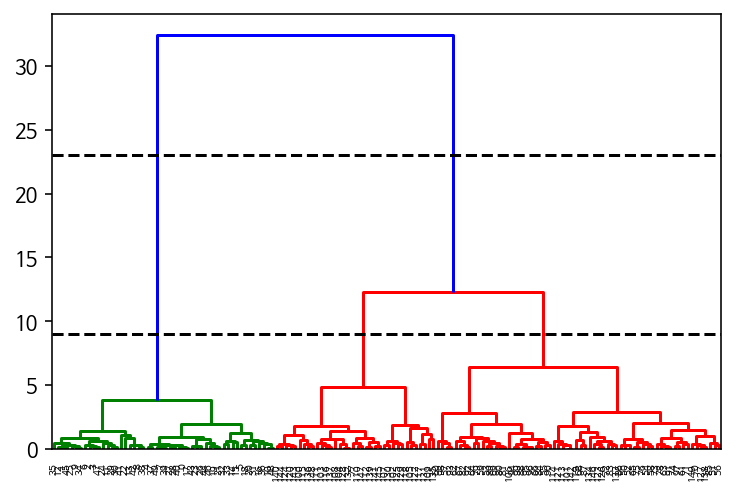

In [125]:
# 덴드로그램으로 시각화
from scipy.cluster.hierarchy import dendrogram, ward

# 데이터 배열 X 에 ward 함수를 적용
# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된
# 거리 정보가 담긴 배열을 리턴
linkage_array = ward( df )

# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램으로 시각화
dendrogram(linkage_array)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [23, 23], '--', c='k') # 2개클러스터
ax.plot(bounds, [9, 9], '--', c='k')   # 3개 클러스터

plt.show()

In [126]:
# 2차원 평면으로 군집 시각화 (차원축소이용)
from sklearn.decomposition import PCA

df['target'] = iris.target
df['cluster'] = agg.labels_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris.data)

df['pca_0'] = X_pca[:, 0]
df['pca_1'] = X_pca[:, 1]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_0,pca_1
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


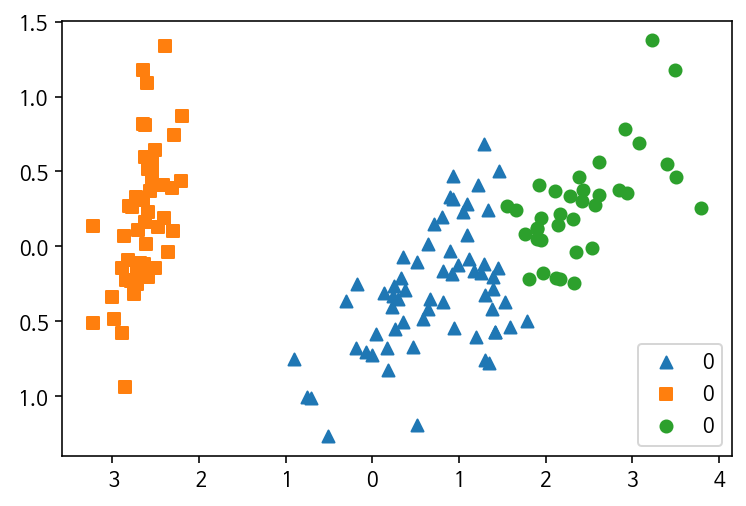

In [127]:
# 각 cluster 별 산점도 
markers = ['^', 's', 'o']
for i, m in enumerate(markers):
  x_data = df[ df['cluster'] == i ]['pca_0']
  y_data = df[ df['cluster'] == i ]['pca_1']
  plt.scatter(x_data, y_data, marker=m, label=iris.target[i])

plt.legend()
plt.show()

In [128]:
agg.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [129]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [130]:
df.groupby( ['target', 'cluster'])['sepal_length'].count()

target  cluster
0       1          50
1       0          49
        2           1
2       0          15
        2          35
Name: sepal_length, dtype: int64

#### 군집(clustering) 실습 03-2

구형이 아닌 클러스터의 모양 데이터를 활용한 병합 군집

In [ ]:
from sklearn.cluster import AgglomerativeClustering

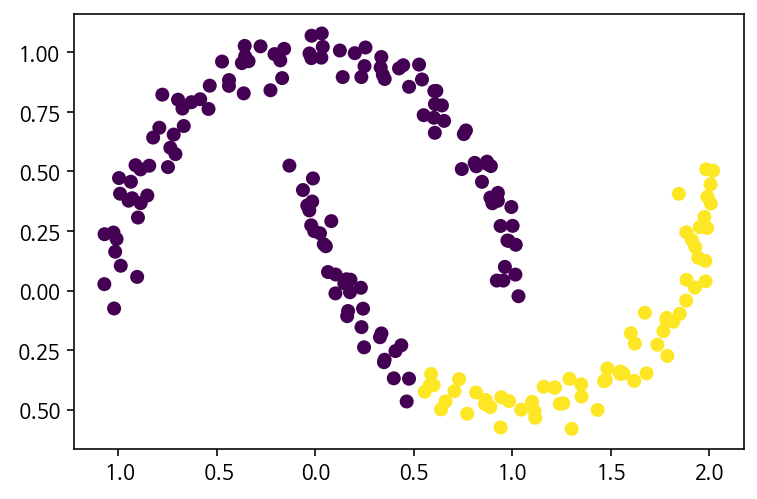

In [131]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

agg = AgglomerativeClustering(n_clusters = 2)
agg.fit(X)

plt.scatter(X[:,0], X[:, 1], c = agg.labels_)
plt.show()

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

- 밀도 기반 군집화의 대표적인 알고리즘
- 특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 함 
- 복잡한 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화를 잘 수행
- 밀도 있게 연결돼 있는(density-connected) 데이터 집합은 동일한 클러스터라고 판단




DBSCAN 데이터 포인트 정의

- 핵심 포인트(Core Point) : 주변영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우

- 이웃 포인트(Neighbor Point) : 주변 영역 내에 위치한 타 데이터

- 경계 포인트(Border point) : 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터

- 잡음 포인트(Noise Point) : 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터

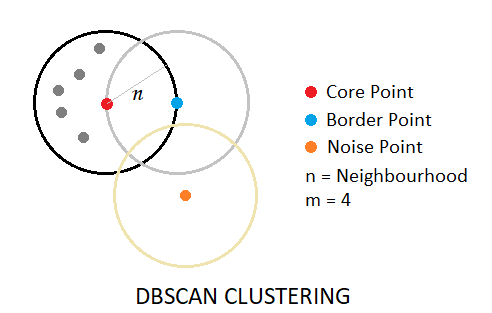

DBSCAN 군집화 과정

1. 어떤 학습데이터가 코어로 정의되면 주변의 이웃 점들을 차례로 방문하면서 각 점들이 코어인지 아닌지 판단
2. 코어이면 앞서 진행했던 방법과 마찬가지로 재귀적으로 반복하고 경계이면 진행을 중단
3. 중단되면 학습 데이터 세트에 있는 다음 점으로 다시 시작
 - 새로 시작할 때는 새로운 클러스터 레이블을 갖음


DBSCAN 장단점

- 클러스터의 개수를 미리 지정할 필요가 없음
- 복잡한 형상이나, 어떤 클래스에도 속하지 않는 포인트를 구분할 수 있음(Noise)
- 병합 군집이나 K-means 보다 느리지만 비교적 큰 데이터셋에도 적용 가능

[DBSCAN()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)
```
DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
```
Parameters :
- eps : 핵심 샘플 거리(반지름)
- min_samples : 클러스터내의 최소 데이터 개수
 - 1일 경우 모든 점이 클러스터가 됨
 - 2보다 작을 경우 : single link 계산법으로 구한 계층적 군집 방법과 같아지므로 적어도 3은 되어야 함



min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


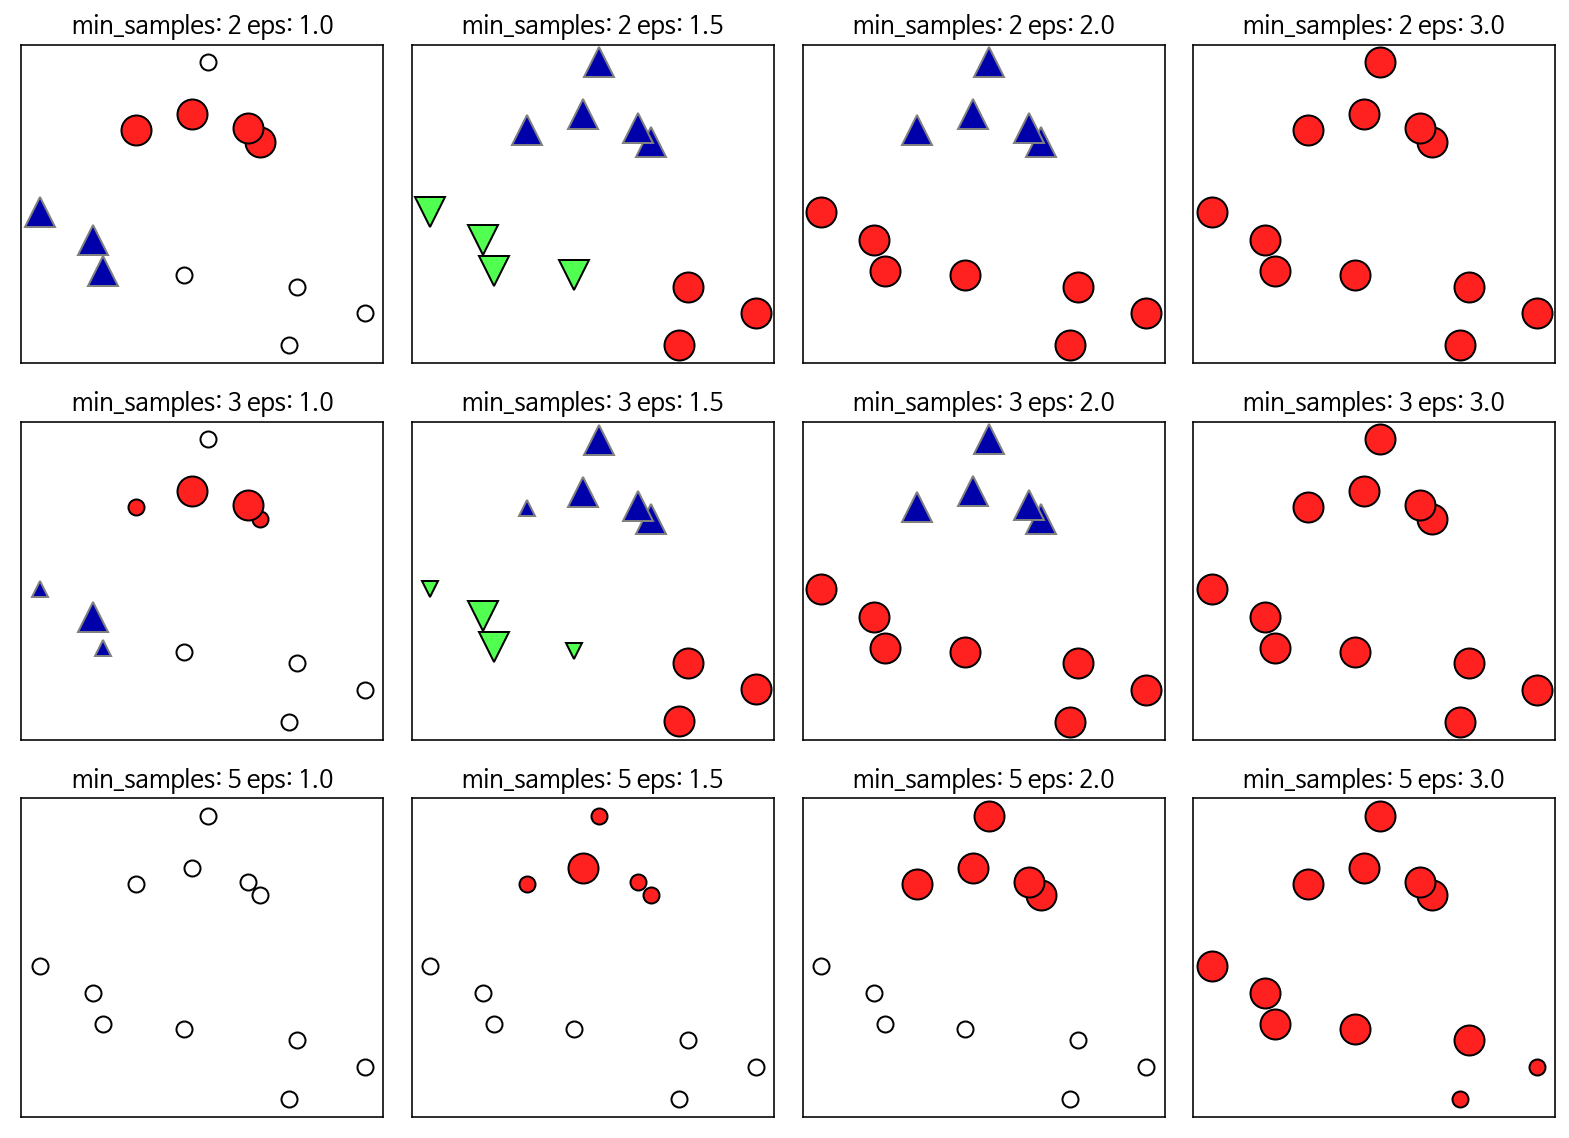

In [132]:
# min_samples와 eps 매개변수를 바꿔가며 DBSCAN으로 계산한 클러스터 할당(예측)
mglearn.plots.plot_dbscan()

- min_sample를 키우면 핵심 포인트 수가 줄어들며 잡음 포인트가 늘어남

- eps를 증가시키면 하나의 클러스터에 더 많은 포인트가 포함
 - 클러스터를 커지게 하지만 여러 클러스터를 하나로 합치게도 만듦
 - DBSCAN은 클러스터의 개수를 지정할 필요가 없지만 eps의 값은 간접적으로 몇 개의 클러스터가 만들어질지 제어 가능

#### 군집(clustering) 실습 04

구형이 아닌 클러스터의 모양에 DBSCAN 적용


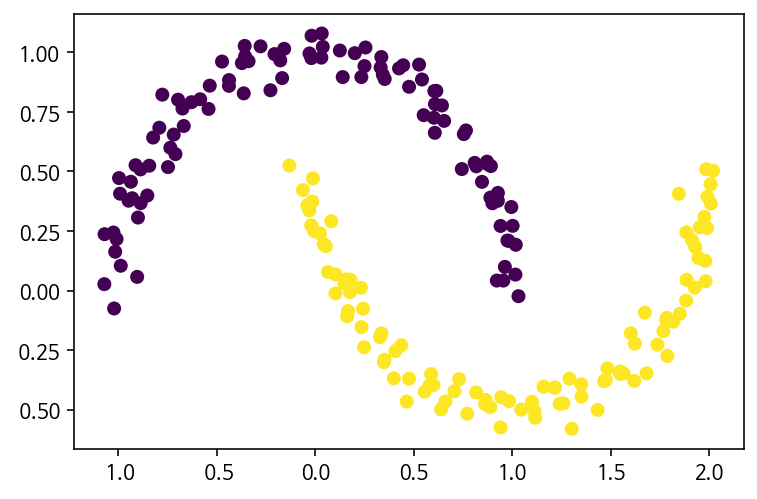

In [135]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# two_moons 데이터를 생성
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정
X_scaled = StandardScaler().fit_transform(X)

# 두 개의 클러스터로 데이터에 DBSCAN 알고리즘을 적용
# default eps=0.5
dbscan = DBSCAN()
dbscan.fit(X_scaled)

# 클러스터 할당을 표시
plt.scatter(X[:, 0], X[:, 1], c =dbscan.labels_)
plt.show()

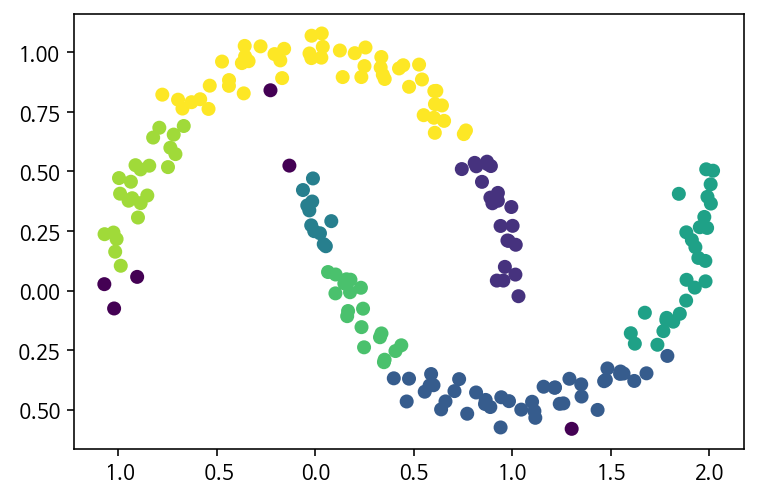

In [150]:
# DBSCAN(eps=0.2)
dbscan = DBSCAN(eps = 0.2)
dbscan.fit(X_scaled)

# 클러스터 할당을 표시
plt.scatter(X[:, 0], X[:, 1], c =dbscan.labels_)
plt.show()

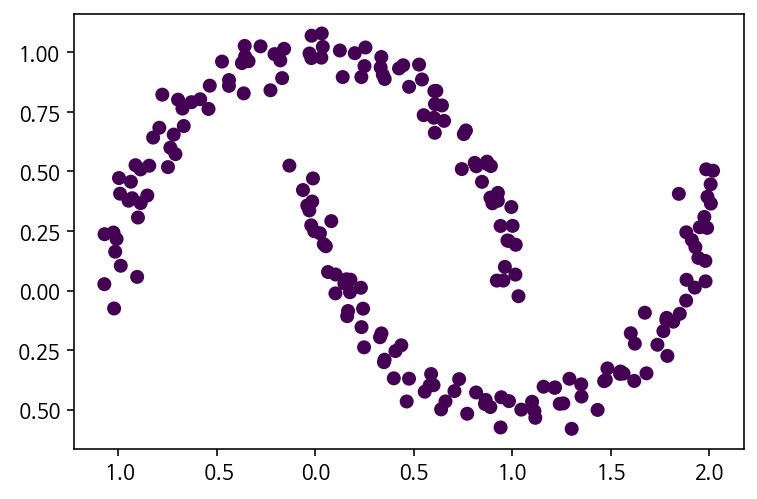

In [151]:
# DBSCAN(eps=0.7)
dbscan = DBSCAN(eps=0.7)
dbscan.fit(X_scaled)

# 클러스터 할당을 표시
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_)
plt.show()

## 군집 알고리즘 평가

- 알고리즘이 잘 작동하는지 평가하기가 어려움

- ARI(adjusted rand index) : 군집 알고리즘의 결과를 실제 정답 클러스터와 비교하여 평가
 - 무작위로 클러스터에 포인트를 할당할 경우 ARI 값은 0에 가까워짐
 - 무작위 할당보다 나쁘게 군집되면 음수 값을 가질 수 있음

- 실루엣 분석(silhouette analysis) : 각 군집 간의 거리가 얼마나 효율적으로 분리되어 있는지를 평가
 - 클러스터의 밀집 정도를 계산, 높을 수록 좋으며 최대 점수는 1
 - 실제로 잘 동작하지 않음


#### 타겟값으로 군집 평가

ARI(adjusted rand index)


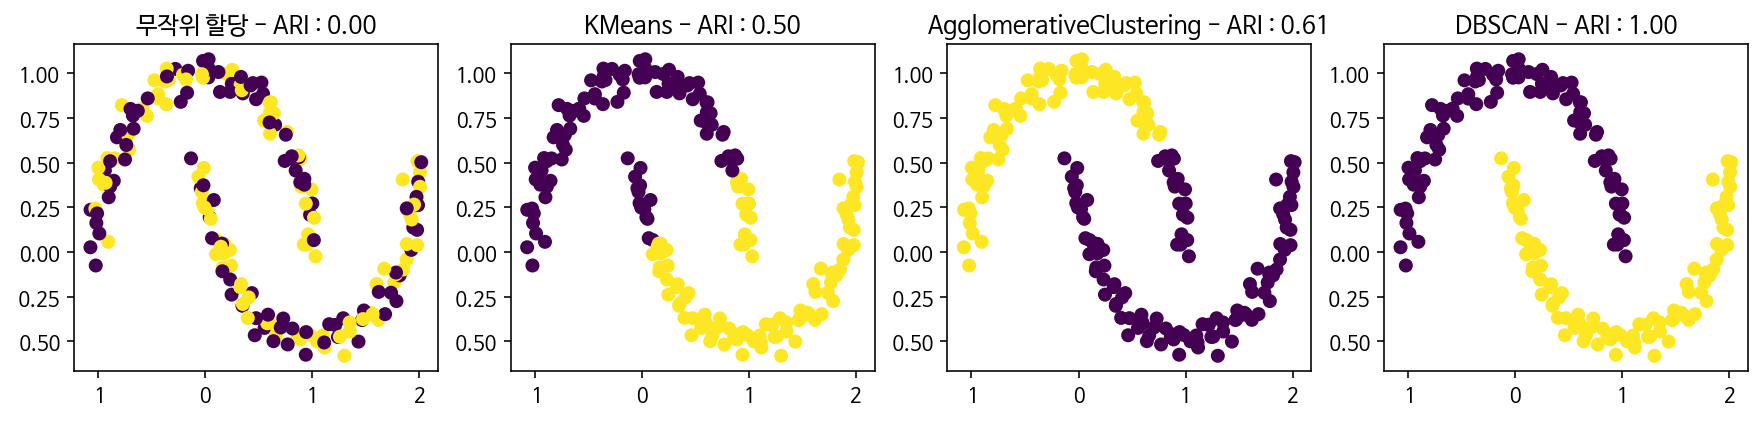

In [159]:
from scipy.sparse.construct import random
from sklearn.metrics.cluster import adjusted_rand_score

# two_moons 데이터를 생성
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정
X_scaled = StandardScaler().fit_transform(X)

# 군집 평가 시각화
fig, axes = plt.subplots(1,4,figsize=(15, 3))

# 비교를 위해 무작위로 클러스터 할당
rnd = np.random.RandomState(seed = 0)
random_cluster = rnd.randint(0, 2, size =len(X))

# 무작위 할당한 클러스터를 시각화
axes[0].scatter(X[:, 0], X[:,1], c = random_cluster)
score = adjusted_rand_score(y, random_cluster)
axes[0].set_title(f'무작위 할당 - ARI : {score:.2f}')

# 사용할 알고리즘 모델을 리스트로 만듦
models = [KMeans(n_clusters=2),
          AgglomerativeClustering(n_clusters=2),
          DBSCAN()
          ]

# 클러스터 할당과 클러스터 중심을 시각화
for model, ax in zip(models, axes[1:]) :
    model.fit(X_scaled)
    ax.scatter(X[:, 0], X[:,1], c = model.labels_)
    score = adjusted_rand_score(y, model.labels_)
    ax.set_title(f'{model.__class__.__name__} - ARI : {score:.2f}')

- two_moons 데이터셋에 적용한 무작위 할당, K-means, 병합군집, DBSCAN의 ARI 점수 비교


In [160]:
# 주의!! 예측정확도가 아닌 군집용 측정도구(ARI)를 이용
from sklearn.metrics import accuracy_score

# 포인트가 클러스터로 나뉜 두 가지 경우
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]

accuracy_score(clusters1, clusters2), adjusted_rand_score(clusters1, clusters2)

(0.0, 1.0)

- 군집용 측정 도구를 이용
 - adjusted_rand_score()
 - normalized_mutual_info_score()

- 정확도를 사용하면 할당된 클러스터의 레이블 이름이 실제 레이블 이름과 맞는지 확인
- 클러스터 레이블은 그 자체로 의미가 있는 것이 아니며 포인트들이 같은 클러스터에 속해 있는가만이 중요

#### 타겟값 없이 군집 평가

실루엣 분석(silhouette analysis)


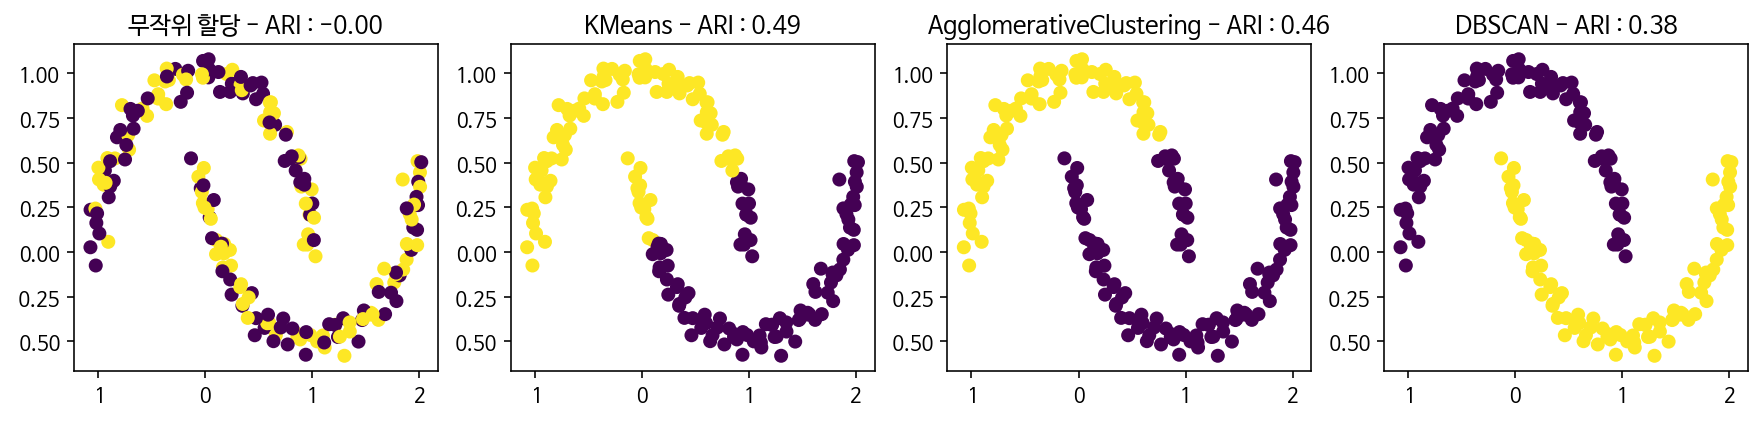

In [162]:
from sklearn.metrics.cluster import silhouette_score

# two_moons 데이터를 생성
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정
X_scaled = StandardScaler().fit_transform(X)

# 군집 평가 시각화
fig, axes = plt.subplots(1,4,figsize=(15, 3))

# 비교를 위해 무작위로 클러스터 할당
rnd = np.random.RandomState(seed = 0)
random_cluster = rnd.randint(0, 2, size =len(X))

# 무작위 할당한 클러스터를 시각화
axes[0].scatter(X[:, 0], X[:,1], c = random_cluster)
score = silhouette_score(X, random_cluster)
axes[0].set_title(f'무작위 할당 - ARI : {score:.2f}')

# 사용할 알고리즘 모델을 리스트로 만듦
models = [KMeans(n_clusters=2),
          AgglomerativeClustering(n_clusters=2),
          DBSCAN()
          ]

# 클러스터 할당과 클러스터 중심을 시각화
for model, ax in zip(models, axes[1:]) :
    model.fit(X_scaled)
    ax.scatter(X[:, 0], X[:,1], c = model.labels_)
    score = silhouette_score(X_scaled, model.labels_)
    ax.set_title(f'{model.__class__.__name__} - ARI : {score:.2f}')

plt.show()

- two_moons 데이터셋에 적용한 무작위 할당, K-means, 병합군집, DBSCAN의 실루엣 점수 비교

- 더 나은 군집을 만든 DBSCAN의 실루엣 점수가 K-means 보다 낮음 (낮은 신뢰도)

#### 군집(clustering) 실습 05 - 1
이미지 분할

In [178]:
from matplotlib.image import imread

image = imread(drive_path + 'lenna.png')
image.shape

(512, 512, 3)

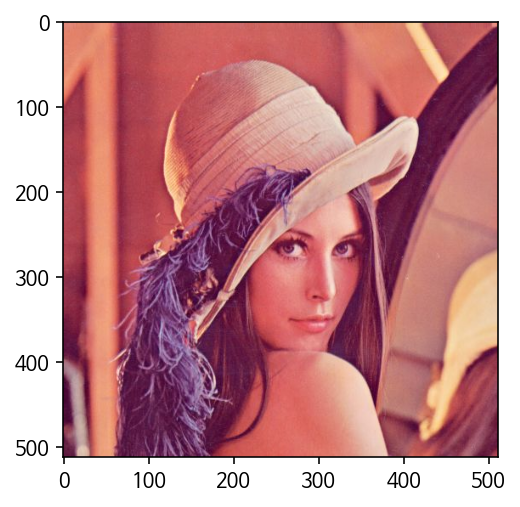

In [179]:
plt.imshow(image)

In [180]:
# RGB 색상의 긴 리스트로 변환
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=0).fit(X)
img = kmeans.cluster_centers_[kmeans.labels_]

In [181]:
X.shape, img.shape

((262144, 3), (262144, 3))

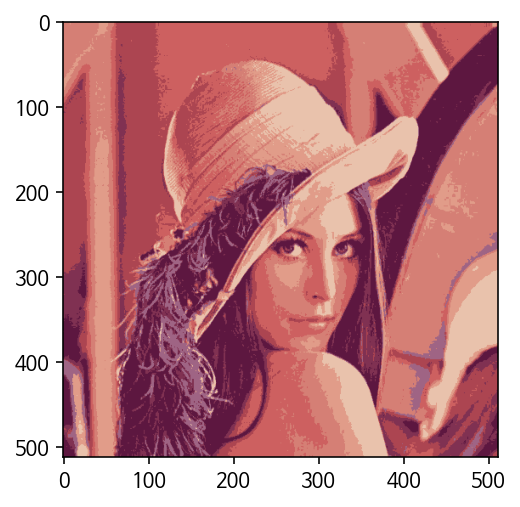

In [182]:
img = img.reshape(image.shape)
plt.imshow(img)

In [183]:
img_list = []
n_cluster = (10, 8, 6, 4, 2)
for n in n_cluster:
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
  img = kmeans.cluster_centers_[kmeans.labels_]
  img_list.append( img.reshape(image.shape) )

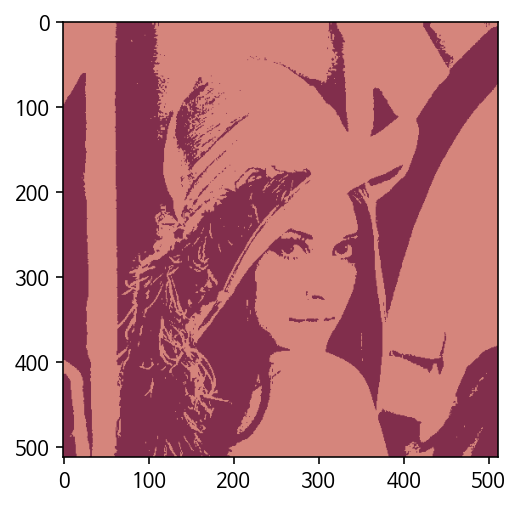

In [184]:
plt.imshow(img_list[4])

#### 군집(clustering) 실습 05 - 2
전처리

In [185]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [186]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='ovr', max_iter=5000, random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9688888888888889

In [188]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
                     ('kmeans', KMeans(n_clusters=50, random_state =42) ),
                     ('lr', LogisticRegression(multi_class='ovr', max_iter=5000, random_state=0))
                    ])

pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.9777777777777777

In [192]:
from sklearn.model_selection import GridSearchCV

param_grid = dict( n_clusters = range(2, 50) )
gs = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


ValueError: ignored

In [ ]:
gs.best_params_